In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

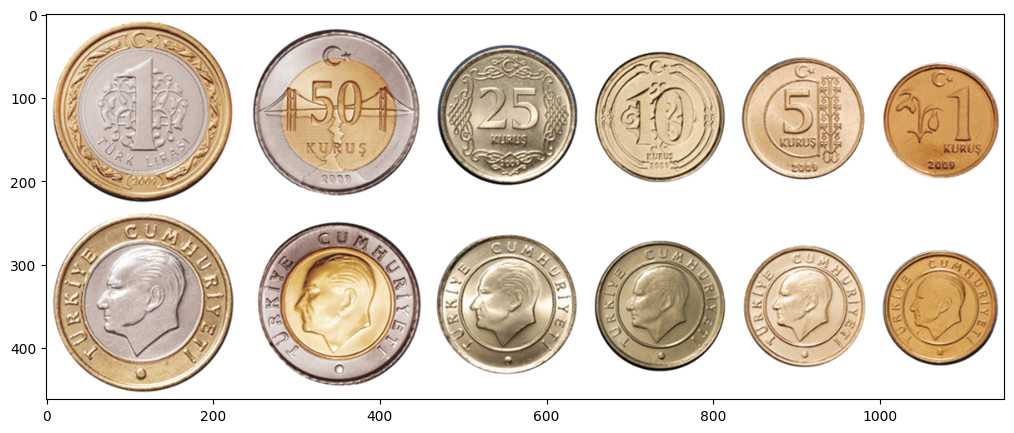

In [10]:
img=cv2.imread("../img/Turkish_Lira.png")
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

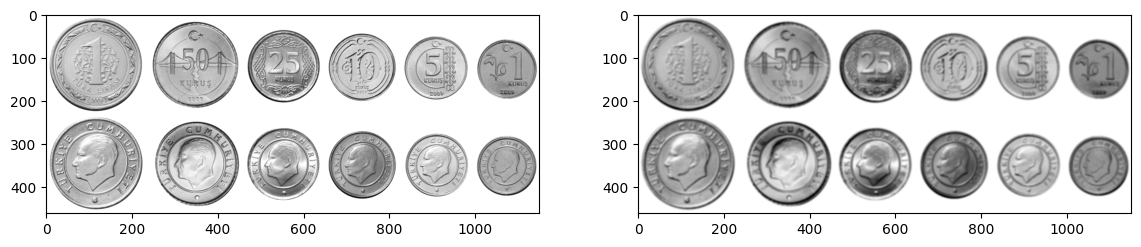

In [12]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur=cv2.GaussianBlur(imgGray,(9,9),0)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgGray,cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imgBlur,cmap='gray')

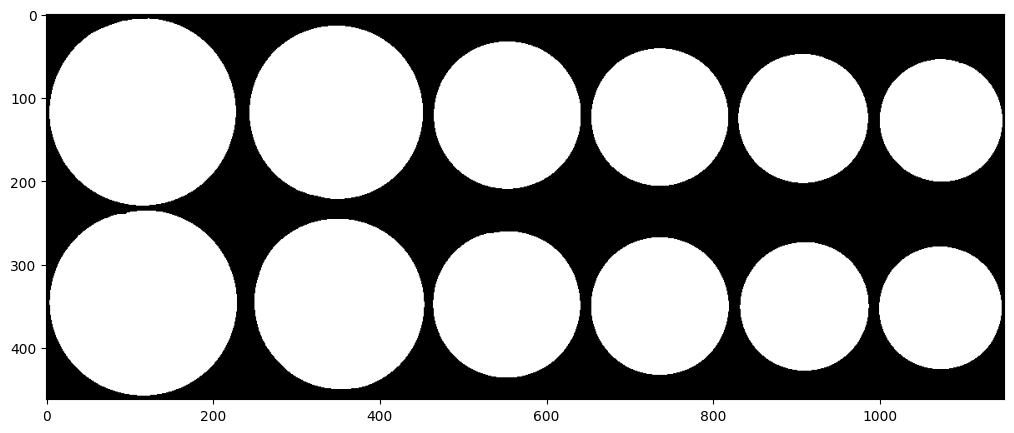

In [14]:
thresh=255
imgThresh = (imgBlur < thresh).astype(np.uint8) * 255
kernel = np.ones((1, 1), np.uint8)
img_erosion = cv2.erode(imgThresh, kernel, iterations=1)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img_erosion,cmap="gray")
plt.show()

In [15]:
contours, hierarchy = cv2.findContours(img_erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

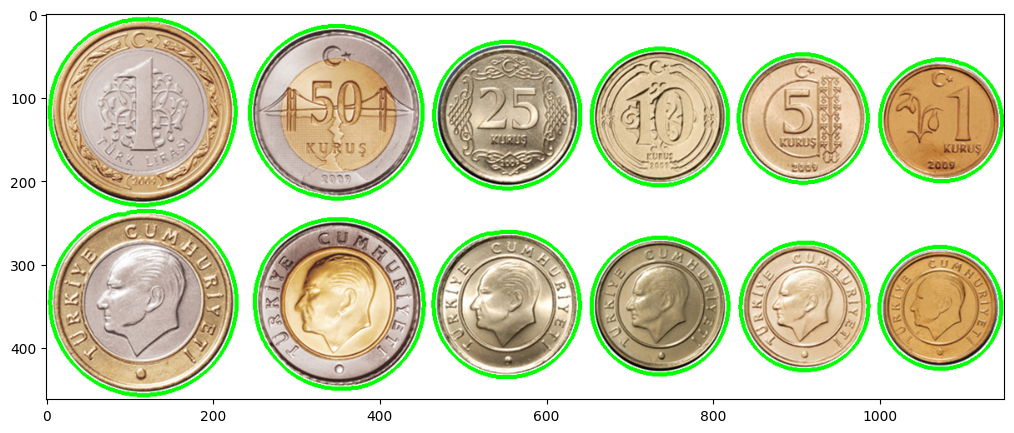

In [16]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

In [17]:
def proportional_difference(value1, value2):
    try:
        diff = abs(value1 - value2)
        avg = (value1 + value2) / 2
        percentage_diff = (diff / avg) * 100
        return percentage_diff
    except ZeroDivisionError:
        # Handle the case where one of the values is zero.
        return float('inf')

In [18]:
groupNumber=0
for c1 in range(len(contours)):
    for c2 in range(c1+1,len(contours)):
        percentage_diff = proportional_difference(cv2.contourArea(contours[c1]),  cv2.contourArea(contours[c2]))

        if percentage_diff<=5:
            print(percentage_diff,cv2.contourArea(contours[c1]),cv2.contourArea(contours[c2]))
            cv2.drawContours(img, [contours[c1]], -1, (0, 255, 0), 3)
            cv2.drawContours(img, [contours[c2]], -1, (0, 255, 0), 3)
            M = cv2.moments(contours[c1])
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])

                # Put text at the centroid
                text = str(groupNumber)
                cv2.putText(img, text, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            M = cv2.moments(contours[c2])
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])

                # Put text at the centroid
                text = str(groupNumber)
                cv2.putText(img, text, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            groupNumber+=1

0.3276930409914204 16811.5 16756.5
1.2508237952414898 18471.5 18704.0
0.5889379013469885 21202.0 21077.5
0.49696357318871215 24187.0 24307.5
3.6450354315555926 32523.5 33731.0
0.5642689511009656 38878.5 39098.5


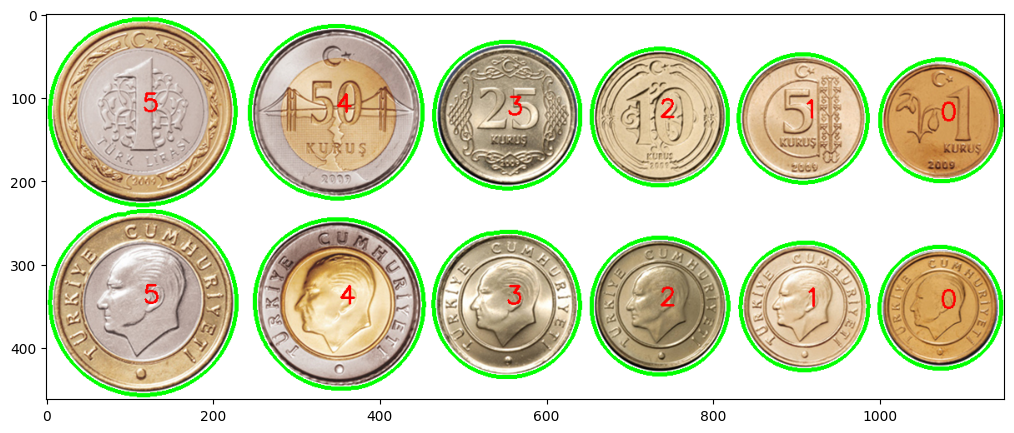

In [19]:
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()